In [1]:
push!(LOAD_PATH, "..")
using ASE
# using MatSciPy
using PyPlot
using PyCall
import TightBinding

9

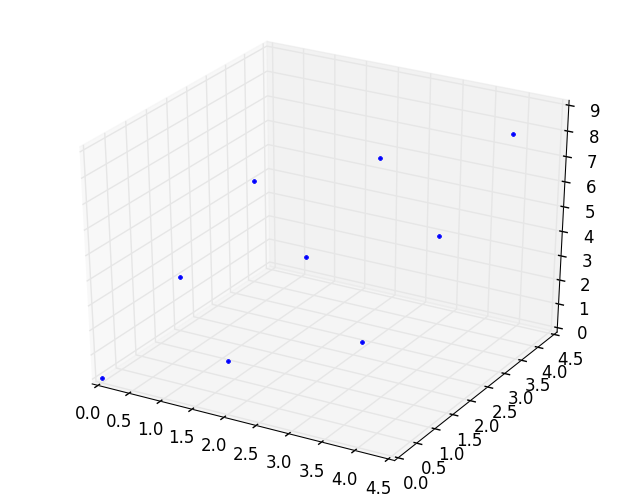

In [2]:
at = bulk("Al") #; cubic=true)
at = repeat(at, (3, 3, 1))
X = positions(at)
# set_pbc!(at, [false, false, false])
plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

In [4]:
reload("Potentials")
reload("tbtoymodel")
reload("TightBinding")
reload("MatSciPy")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

15.758671486710963
|f|∞ = 4.614364446098307e-16


In [7]:
set_pbc!(at, [false, false, false])

reload("TightBinding")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

2.2402263145143673
|f|∞ = 0.14601367064044007


In [5]:
reload("Potentials")
reload("TightBinding")
reload("tbtoymodel")

set_pbc!(at, [false, false, false])
#set_pbc!(at, [true, true, true])

tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=8.0)
X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:]
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
    for p = 2:12
        h = 0.1^p
        dfh = zeros(length(df))
        for n = 1:length(df)
            X[n] += h
            set_positions!(at, X)
            dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
            X[n] -= h
        end
    #@printf(" %2d | %1.7e \n", p, norm(df - dfh, Inf))
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
    end
println("-----------------------------")


-----------------------------
  p | error 
----|------------------------
  2 | 1.4867346e-03 
  3 | 1.4867270e-04 
  4 | 1.4867263e-05 
  5 | 1.4865886e-06 
  6 | 1.5010215e-07 
  7 | 2.4461734e-08 
  8 | 3.1718760e-07 
  9 | 3.1797765e-06 
 10 | 3.8596093e-05 
 11 | 3.8683979e-04 
 12 | 3.9968029e-03 
-----------------------------


In [7]:
# TEST the NRL-TB hamiltonian constructor
import NRLTB
reload("NRLTB")
a = rand(3)*6

f = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
df = NRLTB.d_mat_local(norm(a), a, NRLTB.Al_spd, "dH")
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += h
        fh = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
        dfh[n,:] = (fh - f) / h
        a[n] -= h
    end
    err = reshape(dfh - df, 3*81)
    @printf(" %2d | %1.7e \n", p, norm(err,Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 4.7936432e-04 
  3 | 4.8252387e-05 
  4 | 4.8284068e-06 
  5 | 4.8288380e-07 
  6 | 4.8356390e-08 
  7 | 4.7385025e-09 
  8 | 1.5400929e-08 
  9 | 1.1461380e-07 
 10 | 1.1590824e-06 
 11 | 9.4107278e-06 
 12 | 1.6019853e-04 
-----------------------------


In [6]:
# TEST NRL-TB for Aluminum FCC

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)

X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 7.6705939e-04 
  3 | 7.6664808e-05 
  4 | 7.6660204e-06 
  5 | 7.6672147e-07 
  6 | 7.9753294e-08 
  7 | 9.3660712e-08 
  8 | 1.1296477e-06 
  9 | 1.0467069e-05 
 10 | 1.0994305e-04 
 11 | 1.1782421e-03 
 12 | 6.8578955e-03 
-----------------------------


In [3]:
# TEST NRL-TB for Aluminum FCC
# WITH PERIODIC BOUNDARY CONDITION ON THIRD DIMENSION
# TAKE nkpoints = (0,0,4)

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,4)


X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

LoadError: LoadError: InterruptException:
while loading In[3], in expression starting on line 18

# Performance Tests (CO)

In [1]:
push!(LOAD_PATH, "..")
using ASE, TestAtoms
import TightBinding
import NRLTB
import ProfileView, Base.Profile

In [7]:
at = bulk("Al"; cubic=true)
at = repeat(at, (4, 3, 1))
set_pbc!(at, [false, false, true])
X = positions(at)
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,1)
# TestAtoms.test_potentialenergy(tbm, at)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)

@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);

# TightBinding.forces_debug(at, tbm)
;

  0.345377 seconds (559.68 k allocations: 324.792 MB, 23.51% gc time)
  0.336431 seconds (559.75 k allocations: 324.824 MB, 22.30% gc time)
  0.352452 seconds (559.68 k allocations: 324.792 MB, 22.07% gc time)
  0.332860 seconds (559.68 k allocations: 324.792 MB, 24.41% gc time)
  0.308003 seconds (1.24 M allocations: 290.920 MB, 11.97% gc time)
  0.280479 seconds (1.24 M allocations: 290.920 MB, 8.55% gc time)
  0.285993 seconds (1.24 M allocations: 290.920 MB, 7.39% gc time)
  0.336620 seconds (1.24 M allocations: 290.920 MB, 22.21% gc time)


In [3]:
@code_warntype TightBinding.hamiltonian(at, tbm, rand(3))

0.321252 seconds (1.24 M allocations: 289.678 MB, 21.92% gc time)
Variables:
  atm::ASE.ASEAtoms
  tbm::TightBinding.TBModel
  k::Array{Float64,1}
  nlist::MatSciPy.NeighbourList
  nnz_est::INTEGER
  It::Array{Int32,1}
  Jt::Array{Int32,1}
  Ht::Array{Complex{Float64},1}
  Mt::Array{Complex{Float64},1}
  idx::Int64
  norbsq::Int64
  o::Array{Int32,1}
  ot::Array{Int32,2}
  X::Array{Float64,2}
  #s41::MatSciPy.AtomIteratorState
  n::Int64
  neigs::Array{Int32,1}
  r::Array{Float64,1}
  R::Array{Float64,2}
  #s40::Int64
  In::Array{Int64,1}
  H_nn::Array{Float64,2}
  M_nn::Array{Float64,2}
  #s35::Int64
  #77#i::Int64
  #s36::Int64
  #78#j::Int64
  #s39::Int64
  m::Int64
  Im::Array{Int64,1}
  kR::Float64
  exp_i_kR::Complex{Float64}
  H_nm::ANY
  M_nm::ANY
  #s37::Int64
  #75#i::Int64
  #s38::Int64
  #76#j::Int64
  ##index#8337::Int64
  _var0::ANY
  ##xs#8338::Tuple{}
  ##dims#8339::TUPLE{INTEGER}
  ##dims#8340::TUPLE{INTEGER}
  ##dims#8341::TUPLE{INTEGER}
  ##dims#8342::TUPLE{INTEGER}


In [3]:


at = bulk("Al"; cubic=true)
at = repeat(at, (4, 4, 1))
X = positions(at)
set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,4)

Profile.clear()
@profile f = TightBinding.potential_energy(at, tbm);
set_positions!(at, X+0.1*rand(size(X)))
@profile f = TightBinding.potential_energy(at, tbm);


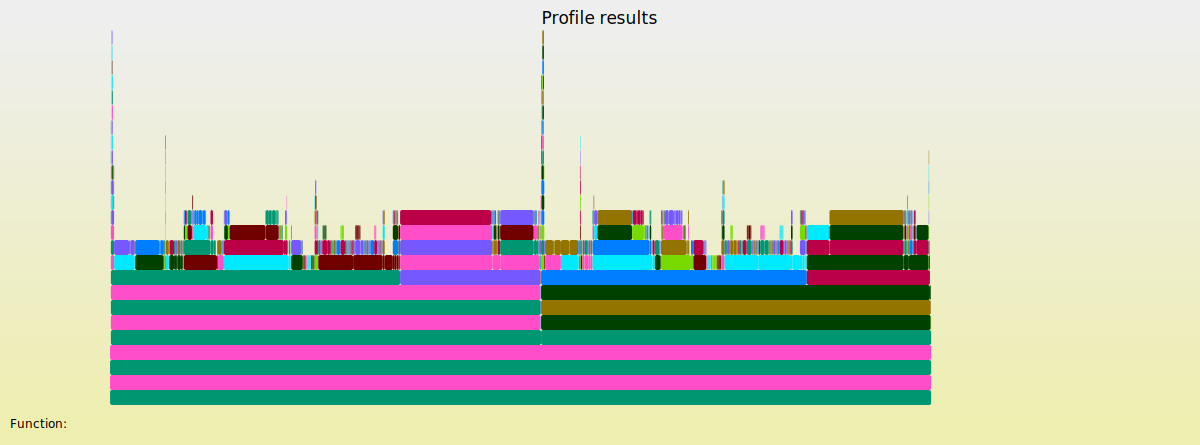

In [4]:
ProfileView.view()